## SEAMS 2019 demonstration of analysis

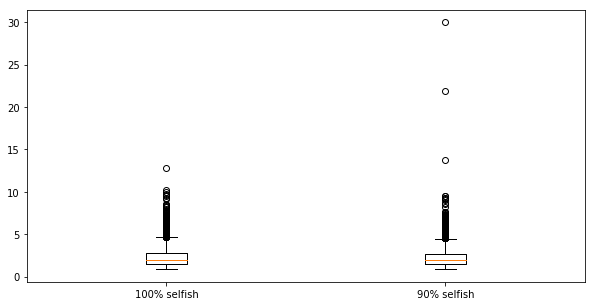

************
OVERHEAD
************
100% selfish
Average overhead is 2.31678413344
Median overhead is 1.98803730531
Variance of overhead is 1.54979723957
************
90% selfish
Average overhead is 2.2577644053
Median overhead is 1.95449236105
Variance of overhead is 1.70545585871
************
There is a decrease of trip overhead by 1.68733977853%


In [5]:
%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean, median, variance
plt.rcParams['figure.figsize'] = [10, 5]
import pprint
import math

def get_overheads(file_name):
    data = []
    with open(file_name, 'r') as results:
        for line in results:
            line = line.split(",")
            trip_duration = float(line[4])
            overhead = float(line[6])
            agent = line[7]
            preference = line[8].replace('\r', '').replace('\n', '')
            
            data.append(overhead)
    return data

overheads_100percent_selfish = get_overheads("data/2000-ticks/overheads-b1.csv")
overheads_90percent_selfish = get_overheads("data/2000-ticks/overheads-b0.9.csv")

overheads = []
overheads.append(overheads_100percent_selfish)
overheads.append(overheads_90percent_selfish)

labels = []
labels.append("100% selfish")
labels.append("90% selfish")

plt.figure()
plt.boxplot(overheads, labels=labels)
plt.show()

print("************")
print("OVERHEAD")
print("************")
for i in range(len(overheads)):   
    print("%s" % (labels[i]))
    print("Average overhead is % s" % (mean(overheads[i]))) 
    print("Median overhead is % s" % (median(overheads[i]))) 
    print("Variance of overhead is % s" % (variance(overheads[i]))) 
    print("************")
    

baseline = median(overheads_100percent_selfish)
diff_percentage_90 = ((median(overheads_90percent_selfish) - baseline) / baseline) * 100

print "There is a decrease of trip overhead by " + str(abs(diff_percentage_90)) + "%"

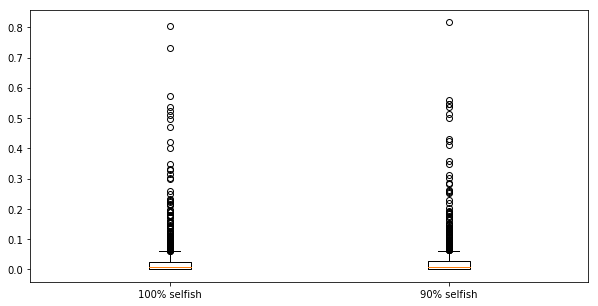

************
STREET UTILIZATION
************
100% selfish
Average street utilization is 0.0274811714409
Median street utilization is 0.00788316582915
Variance of street utilization is 0.00429438150635
************
90% selfish
Average street utilization is 0.0270357218462
Median street utilization is 0.00795190069822
Variance of street utilization is 0.00398273711074
************
There is a variance of street utilization by 7.25702630626%


In [6]:
def get_utilizations(file_name):
    utilizations = []
    line_no = 0
        
    with open(file_name, 'r') as results:
        for line in results:
            line = line.split(",")
            line[len(line)-1] = line[len(line)-1].replace('\r', '').replace('\n', '')
            line_no = line_no + 1
            if line_no == 1:
                edges = line
            else: 
                utilizations.append([float(u) for u in line[1:]])   
    
    streets_data = {}
    for i in range(len(edges)):
        streets_data[edges[i]] = [utilization[i] for utilization in utilizations]

    streets_utilizations = {}
    for key, value in streets_data.iteritems():
        streets_utilizations[key] = mean(value)
    
    return streets_utilizations

streets_100percent_selfish = get_utilizations("data/2000-ticks/streets-b1.csv")
streets_90percent_selfish = get_utilizations("data/2000-ticks/streets-b0.9.csv")

streets = []
streets.append(streets_100percent_selfish.values())
streets.append(streets_90percent_selfish.values())

labels = []
labels.append("100% selfish")
labels.append("90% selfish")

plt.figure()
plt.boxplot(streets, labels=labels)
plt.show()

print("************")
print("STREET UTILIZATION")
print("************")
for i in range(len(streets)):   
    print("%s" % (labels[i]))
    print("Average street utilization is % s" % (mean(streets[i]))) 
    print("Median street utilization is % s" % (median(streets[i]))) 
    print("Variance of street utilization is % s" % (variance(streets[i]))) 
    print("************")
    
baseline = variance(streets_100percent_selfish.values())
diff_percentage_90 = ((variance(streets_90percent_selfish.values()) - baseline) / baseline) * 100

print "There is a variance of street utilization by " + str(abs(diff_percentage_90)) + "%"